# Task
Analyze the 'student_performance.csv' dataset by loading it into a Pandas DataFrame, performing NumPy operations (mean, median, standard deviation, Min-Max normalization) on the 'Final_Score' column, and using Pandas to display DataFrame shape, column names, and check for missing values. Create a new 'Performance' categorical column based on 'Final_Score' thresholds. Generate Matplotlib visualizations (line plot of 'Hours_Studied' vs. 'Final_Score', histogram of 'Final_Score') and Seaborn visualizations (scatter plot of 'Hours_Studied' vs. 'Final_Score', correlation heatmap, boxplot of 'Final_Score' by 'Performance'). Finally, provide a summary of the analysis, including insights from NumPy calculations, data handling, and visualizations.

## Load Dataset

### Subtask:
Load the 'student_performance.csv' dataset into a Pandas DataFrame.


**Reasoning**:
Load the 'student_performance.csv' dataset into a Pandas DataFrame named `df` and display its first five rows to verify successful loading.



In [ ]:
import pandas as pd
df = pd.read_csv('student_performance.csv')
df.head()

,Hours_Studied,Attendance,Assignment_Score,Midterm_Score,Final_Score
0,1,60,55,50,52
1,2,65,58,55,57
2,3,70,60,58,60
3,4,75,65,62,64
4,5,80,68,65,68


## NumPy Operations on Final_Score

### Subtask:
Extract the 'Final_Score' column as a NumPy array. Compute its mean, median, and standard deviation. Then, perform Min-Max normalization on the 'Final_Score' array.


**Reasoning**:
First, import the `numpy` library. Then, extract the 'Final_Score' column from the DataFrame `df` and convert it to a NumPy array. After that, calculate the mean, median, and standard deviation of this array. Finally, perform Min-Max normalization on the 'Final_Score' array.



In [ ]:
import numpy as np

# Extract 'Final_Score' column as a NumPy array
final_score_array = df['Final_Score'].to_numpy()

# Compute mean, median, and standard deviation
mean_final_score = np.mean(final_score_array)
median_final_score = np.median(final_score_array)
std_dev_final_score = np.std(final_score_array)

print(f"Mean of Final_Score: {mean_final_score:.2f}")
print(f"Median of Final_Score: {median_final_score:.2f}")
print(f"Standard Deviation of Final_Score: {std_dev_final_score:.2f}")

# Perform Min-Max normalization
min_final_score = np.min(final_score_array)
max_final_score = np.max(final_score_array)
normalized_final_score = (final_score_array - min_final_score) / (max_final_score - min_final_score)

print("\nFirst 5 values of Normalized Final_Score:")
print(normalized_final_score[:5])

Mean of Final_Score: 68.95
Median of Final_Score: 70.50
Standard Deviation of Final_Score: 8.71

First 5 values of Normalized Final_Score:
[0.         0.16129032 0.25806452 0.38709677 0.51612903]


## Pandas Data Handling Basics

### Subtask:
Display the shape of the DataFrame, list all column names, and check for any missing values.


**Reasoning**:
Display the shape of the DataFrame, its column names, and check for missing values using Pandas functions.



In [ ]:
print(f"DataFrame Shape: {df.shape}")
print(f"Column Names: {df.columns.tolist()}")
print("\nMissing Values per Column:\n", df.isnull().sum())

DataFrame Shape: (20, 5)
Column Names: ['Hours_Studied', 'Attendance', 'Assignment_Score', 'Midterm_Score', 'Final_Score']

Missing Values per Column:
 Hours_Studied       0
Attendance          0
Assignment_Score    0
Midterm_Score       0
Final_Score         0
dtype: int64


## Create Performance Label

### Subtask:
Create a new categorical column named 'Performance' in the DataFrame based on the 'Final_Score'.


**Reasoning**:
Define the thresholds for 'High', 'Medium', and 'Low' performance based on 'Final_Score', then use `np.select` to create the new 'Performance' column and display its value counts.



In [ ]:
conditions = [
    (df['Final_Score'] >= 80),
    (df['Final_Score'] >= 60) & (df['Final_Score'] < 80),
    (df['Final_Score'] < 60)
]
choices = ['High', 'Medium', 'Low']

df['Performance'] = np.select(conditions, choices, default='Unknown')

print("Value counts for 'Performance' column:")
print(df['Performance'].value_counts())

Value counts for 'Performance' column:
Performance
Medium    14
Low        4
High       2
Name: count, dtype: int64


## Matplotlib Visualizations

### Subtask:
Generate a line plot showing 'Hours_Studied' versus 'Final_Score' and a histogram of the 'Final_Score' distribution. Ensure proper labels and titles are included.


**Reasoning**:
First, import `matplotlib.pyplot`. Then, create two subplots for the line plot and histogram. Generate the line plot of 'Hours_Studied' vs 'Final_Score' with labels and a title on the first subplot. Next, create a histogram of 'Final_Score' with labels and a title on the second subplot. Finally, ensure proper layout and display the plots.



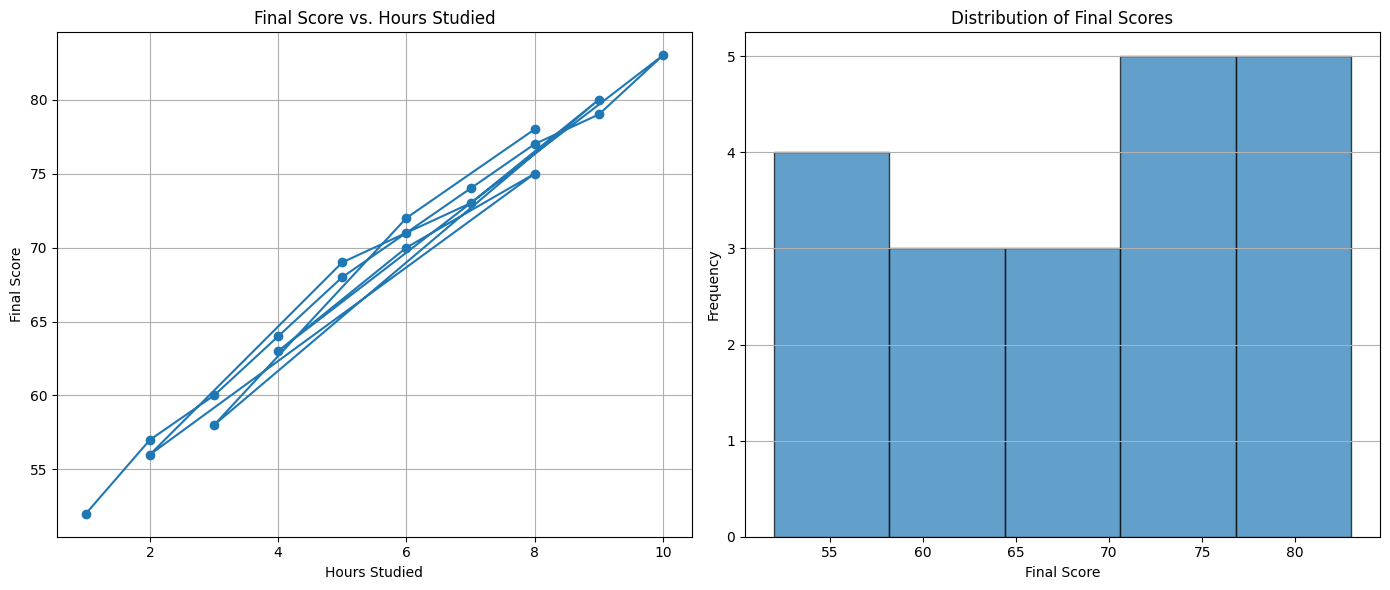

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Line plot: Hours_Studied vs. Final_Score
axes[0].plot(df['Hours_Studied'], df['Final_Score'], marker='o', linestyle='-')
axes[0].set_xlabel('Hours Studied')
axes[0].set_ylabel('Final Score')
axes[0].set_title('Final Score vs. Hours Studied')
axes[0].grid(True)

# Histogram: Distribution of Final_Score
axes[1].hist(df['Final_Score'], bins=5, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Final Score')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Final Scores')
axes[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

## Seaborn Visualizations

### Subtask:
Create a scatter plot, for example between 'Hours_Studied' and 'Final_Score', a correlation heatmap for all relevant numerical columns, and a boxplot to analyze 'Final_Score' across different 'Performance' labels. Ensure all plots have appropriate titles and legends.


**Reasoning**:
Generate the Python code to import Seaborn, create a figure with three subplots, and then plot a scatter plot, a correlation heatmap, and a boxplot as specified in the subtask instructions.



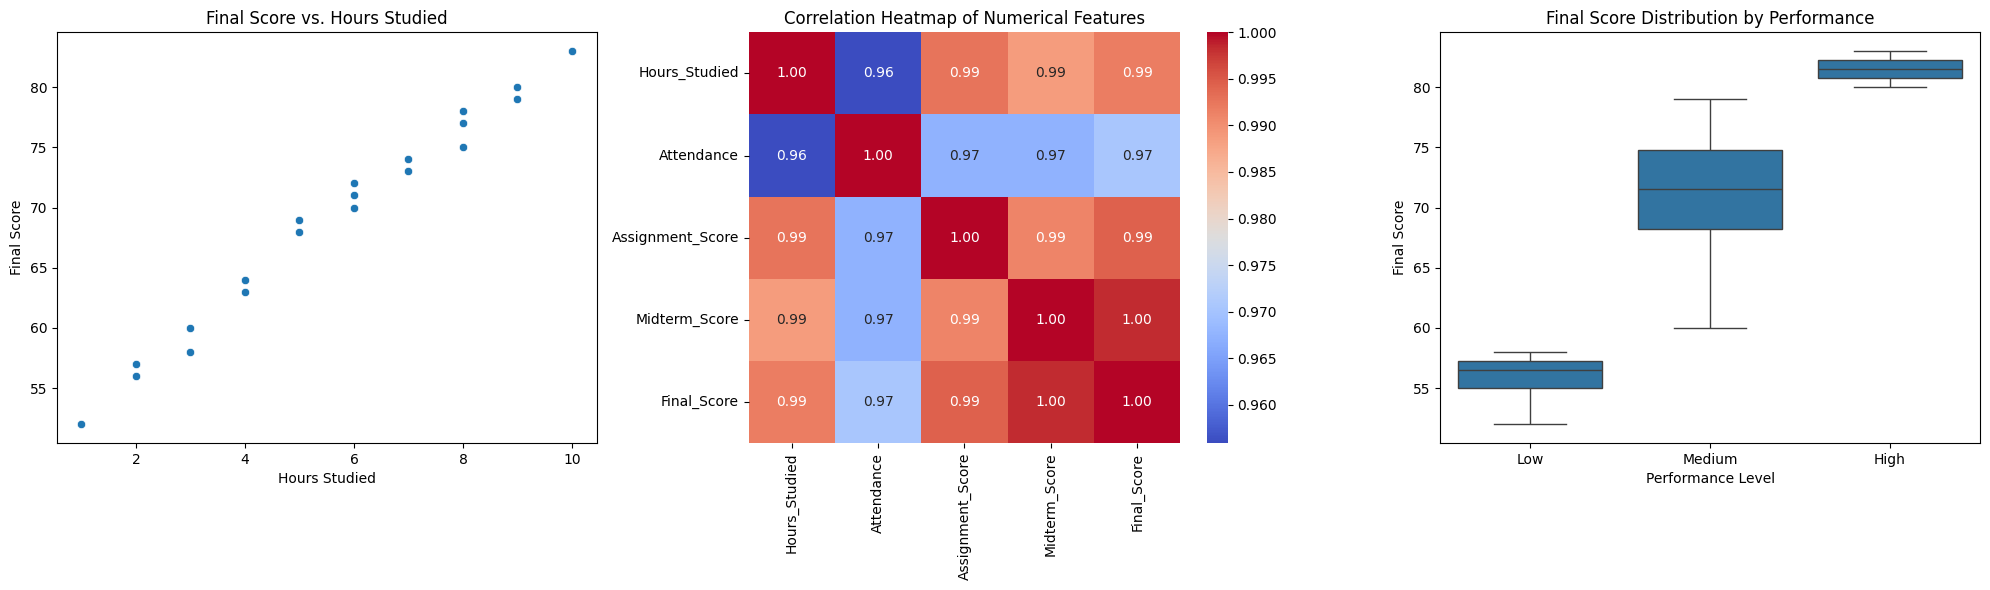

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt # Already imported, but good practice for plot functions

# Create a figure to hold the three subplots
plt.figure(figsize=(20, 6))

# Subplot 1: Scatter plot of Hours_Studied vs. Final_Score
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.scatterplot(x='Hours_Studied', y='Final_Score', data=df)
plt.title('Final Score vs. Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Final Score')

# Subplot 2: Correlation heatmap
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')

# Subplot 3: Boxplot of Final_Score by Performance
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.boxplot(x='Performance', y='Final_Score', data=df, order=['Low', 'Medium', 'High'])
plt.title('Final Score Distribution by Performance')
plt.xlabel('Performance Level')
plt.ylabel('Final Score')

plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Provide a summary of the analysis performed, including insights from the NumPy calculations, data handling steps, and the various visualizations generated.


## Summary:

### Data Analysis Key Findings

*   **Dataset Overview:** The `student_performance.csv` dataset, comprising 20 rows and 5 columns (`Hours_Studied`, `Attendance`, `Assignment_Score`, `Midterm_Score`, `Final_Score`), was successfully loaded with no missing values.
*   **Final Score Statistics:**
    *   The average `Final_Score` is 68.95.
    *   The median `Final_Score` is 70.50.
    *   The standard deviation of `Final_Score` is 8.71, indicating a moderate spread in scores.
    *   Min-Max normalization was applied to the `Final_Score` column for potential future modeling.
*   **Student Performance Categorization:** A new 'Performance' column was created based on `Final_Score`:
    *   'High' ($\geq$ 80): 2 students
    *   'Medium' (60-79): 14 students
    *   'Low' (< 60): 4 students
    *   The majority of students (70%) fall into the 'Medium' performance category.
*   **Visualized Relationships:**
    *   A line plot and scatter plot of 'Hours_Studied' versus 'Final_Score' were generated, suggesting a potential positive relationship between study hours and final scores.
    *   A histogram illustrated the distribution of `Final_Score`, showing a concentration of scores around the mean/median.
    *   A correlation heatmap displayed the relationships between all numerical features.
    *   A boxplot visually compared the distribution of `Final_Score` across the 'Low', 'Medium', and 'High' performance categories, confirming that higher scores correlate with higher performance categories.

### Insights or Next Steps

*   The initial analysis suggests a positive correlation between 'Hours_Studied' and 'Final_Score'. Further investigation with regression analysis could quantify this relationship and predict performance based on study hours.
*   Given the established 'Performance' categories, future analysis could explore which other features (e.g., 'Attendance', 'Assignment_Score', 'Midterm_Score') are most predictive of students falling into 'High' or 'Low' performance groups, aiding in identifying at-risk students or factors contributing to high achievement.
